# Intro to Keras: Neural Networks for Digit Classification
* Getting started with Keras: https://keras.io/
* Sequential model guide: https://keras.io/getting-started/sequential-model-guide/

In [36]:
from keras.datasets import mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data()

In [37]:
# take a closer look
print("Inputs shape is " + str(train_x.shape))
print("Input type is " + str(type(train_x)))
print("Labels:")
print(train_y)
print("Labels shape is" + str(train_y.shape))
print("Labels type is " + str(type(train_y)))

Inputs shape is (60000, 28, 28)
Input type is <class 'numpy.ndarray'>
Labels:
[5 0 4 ..., 5 6 8]
Labels shape is(60000,)
Labels type is <class 'numpy.ndarray'>


In [38]:
train_x.shape

(60000, 28, 28)

In [39]:
import matplotlib.pyplot as plt

5


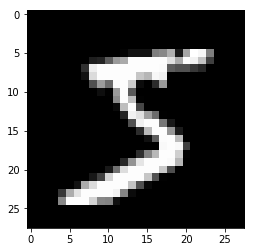

In [40]:
sample_num = 0

plt.imshow(train_x[sample_num], cmap=plt.get_cmap('gray'))
print(train_y[sample_num])
plt.show()

In [52]:
# flatten 28*28 images to a 784 vector for each image

num_pixels = train_x.shape[1] * train_x.shape[2]
train_x_flattened = train_x.reshape(train_x.shape[0], num_pixels).astype('float32')
test_x_flattened = test_x.reshape(test_x.shape[0], num_pixels).astype('float32')

In [53]:
train_x_flattened = train_x_flattened / 255.
test_x_flattened = test_x_flattened / 255.

In [54]:
import keras

train_y_categorical = keras.utils.to_categorical(train_y, num_classes=10)
test_y_categorical = keras.utils.to_categorical(test_y, num_classes=10)

# let's see result of categorizing the outputs
print(test_y_categorical[:5])

[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


In [67]:
from keras.models import Sequential

model = Sequential()

In [68]:
from keras.layers import Dense, Activation

model.add(Dense(units=500, input_dim=784))
model.add(Activation('relu'))
model.add(Dense(units=250))
model.add(Activation('relu'))
model.add(Dense(units=10))
model.add(Activation('softmax'))

In [69]:
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [70]:
from keras_tqdm import TQDMNotebookCallback

In [ ]:
model.fit(train_x_flattened, train_y_categorical, epochs=10, \
          batch_size=32, verbose=0, callbacks=[TQDMNotebookCallback()])

In [60]:
loss_and_metrics = model.evaluate(test_x_flattened, test_y_categorical, batch_size=128)

 9984/10000 [============================>.] - ETA: 0s

In [61]:
loss_and_metrics

[0.64947818093299869, 0.84030000000000005]